In [1]:
# imports for array-handling and plotting
import numpy as np
import matplotlib.pyplot as plt

# let's keep our keras backend tensorflow quiet
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
# for testing on CPU
#os.environ['CUDA_VISIBLE_DEVICES'] = ''

# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
from sklearn.preprocessing import Normalizer

# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train = Normalizer().fit_transform(X_train)
X_test = Normalizer().fit_transform(X_test)

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [4]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [5]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))                            

#
#model.add(Dropout(0.2))

#model.add(Dense(512))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
#
#
#
#
#
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [7]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=2,
          validation_data=(X_test, Y_test))


Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.9696 - accuracy: 0.7852 - val_loss: 0.4432 - val_accuracy: 0.8899
Epoch 2/10
 - 2s - loss: 0.3820 - accuracy: 0.8974 - val_loss: 0.3210 - val_accuracy: 0.9126
Epoch 3/10
 - 2s - loss: 0.3135 - accuracy: 0.9112 - val_loss: 0.2874 - val_accuracy: 0.9186
Epoch 4/10
 - 2s - loss: 0.2843 - accuracy: 0.9187 - val_loss: 0.2670 - val_accuracy: 0.9224
Epoch 5/10
 - 2s - loss: 0.2648 - accuracy: 0.9241 - val_loss: 0.2527 - val_accuracy: 0.9277
Epoch 6/10
 - 2s - loss: 0.2485 - accuracy: 0.9285 - val_loss: 0.2382 - val_accuracy: 0.9303
Epoch 7/10
 - 2s - loss: 0.2333 - accuracy: 0.9331 - val_loss: 0.2260 - val_accuracy: 0.9344
Epoch 8/10
 - 2s - loss: 0.2197 - accuracy: 0.9368 - val_loss: 0.2153 - val_accuracy: 0.9370
Epoch 9/10
 - 2s - loss: 0.2073 - accuracy: 0.9405 - val_loss: 0.2038 - val_accuracy: 0.9412
Epoch 10/10
 - 2s - loss: 0.1956 - accuracy: 0.9441 - val_loss: 0

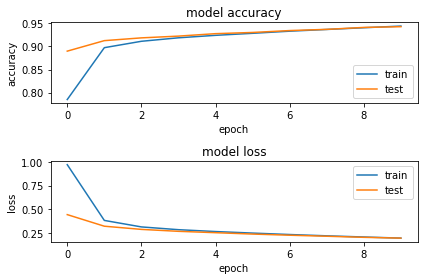

In [8]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
